In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft
import glob

def rfft(y): #this function computes the fft of y
    N = len(y)

    Y = fft.rfft(y)
    Y_abs = np.abs(Y)
    return Y_abs

In [2]:
hour = '15.42'
day = '08082024'

# Method A: FFT of the average of the waveforms

### compute and plot the average of the waveforms

In [3]:
file_pattern = f"../../Waveforms/{day}/{day}_{hour}/{day}_{hour}_wf.csv/{day}_{hour}_wf_*.csv"
file_list_wf = glob.glob(file_pattern)

amplitudes_list_A = []

for i, file in enumerate(file_list_wf):
    df = pd.read_csv(file)
    print(df)
    if i == 0:
        times_A = pd.to_numeric(df.iloc[1:, 0], errors = 'coerce').values
    amplitudes_A = pd.to_numeric(df.iloc[1:, 1], errors='coerce').values
    if np.isnan(amplitudes_A).any():
            nan_indices = np.where(np.isnan(amplitudes_A))[0]
            print(f"Input data contains NaN values in {nan_indices} at {i} file.")
            amplitudes_A[nan_indices] = 0
 
    amplitudes_list_A.append(amplitudes_A)
    
#print(amplitudes_list)

all_amplitudes_A = np.stack(amplitudes_list_A, axis = 0)
print(all_amplitudes_A)

              Time    Channel D
0             (us)         (mV)
1       0.00000000  -1.96850400
2       0.00080000  -1.57480300
3       0.00160000  -1.18110200
4       0.00240000  -0.78740150
...            ...          ...
62500  49.99920067   0.00000000
62501  50.00000067   0.39370070
62502  50.00080067  -0.39370070
62503  50.00160067  -1.18110200
62504  50.00240067  -1.18110200

[62505 rows x 2 columns]
              Time    Channel D
0             (us)         (mV)
1       0.00000000   1.57480300
2       0.00080000   0.78740150
3       0.00160000   0.00000000
4       0.00240000   0.00000000
...            ...          ...
62500  49.99920067   1.57480300
62501  50.00000067   0.78740150
62502  50.00080067  -0.39370070
62503  50.00160067  -2.75590500
62504  50.00240067  -4.72440900

[62505 rows x 2 columns]
              Time    Channel D
0             (us)         (mV)
1       0.00000000  -0.39370070
2       0.00080000  -0.39370070
3       0.00160000   0.39370070
4       0.00240000  

In [4]:
avg_wf =np.mean(all_amplitudes_A, axis=0)

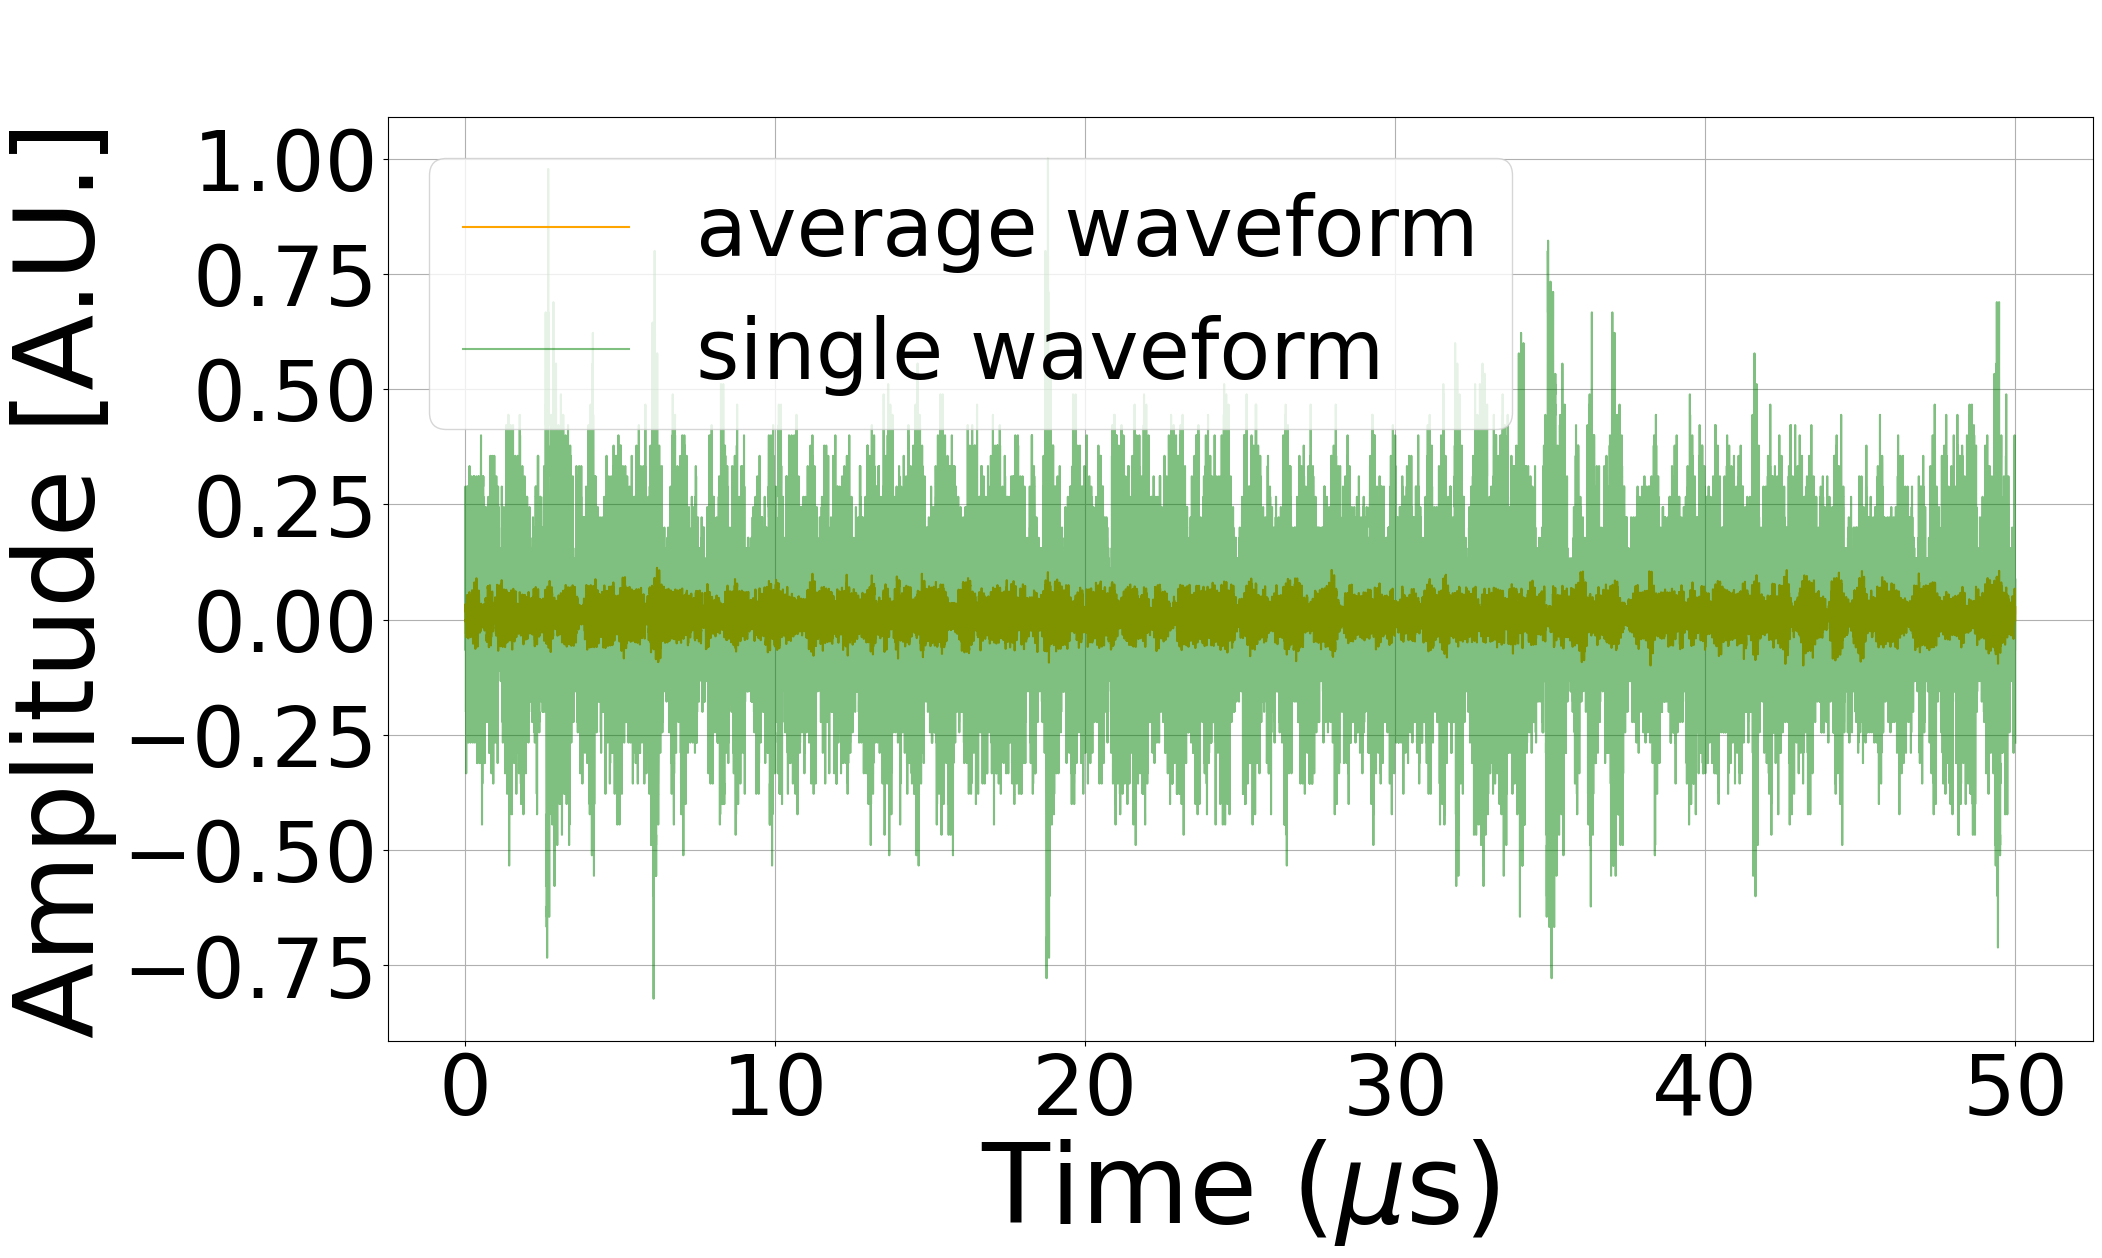

In [5]:
plt.figure(figsize=(22, 12))
plt.plot(times_A, avg_wf/max(all_amplitudes_A[1, :]), color = 'orange', label = 'average waveform')
plt.plot(times_A, all_amplitudes_A[1, :]/max(all_amplitudes_A[1, :]), alpha = 0.5, color = 'green', label = 'single waveform')

plt.title(' ', fontsize = 80)
plt.xlabel(r'Time ($\mu$s)', fontsize = 80)
plt.xticks(fontsize = 60)
plt.ylabel('Amplitude [A.U.]', fontsize = 80)
plt.yticks(fontsize = 60)
plt.legend(loc = "best",  prop={'size': 80})
plt.grid(True)
plt.legend(fontsize = 60)

#plt.savefig("070824_15.46/avg_wf_A.png", format = "png", bbox_inches="tight")
#plt.savefig("../../Results/080824_15.42/methodA_average_wf.pdf", format = "pdf", bbox_inches="tight")

plt.show()

### compute and plot the fft of the average of the waveforms

f_s = 1250.0199822905822


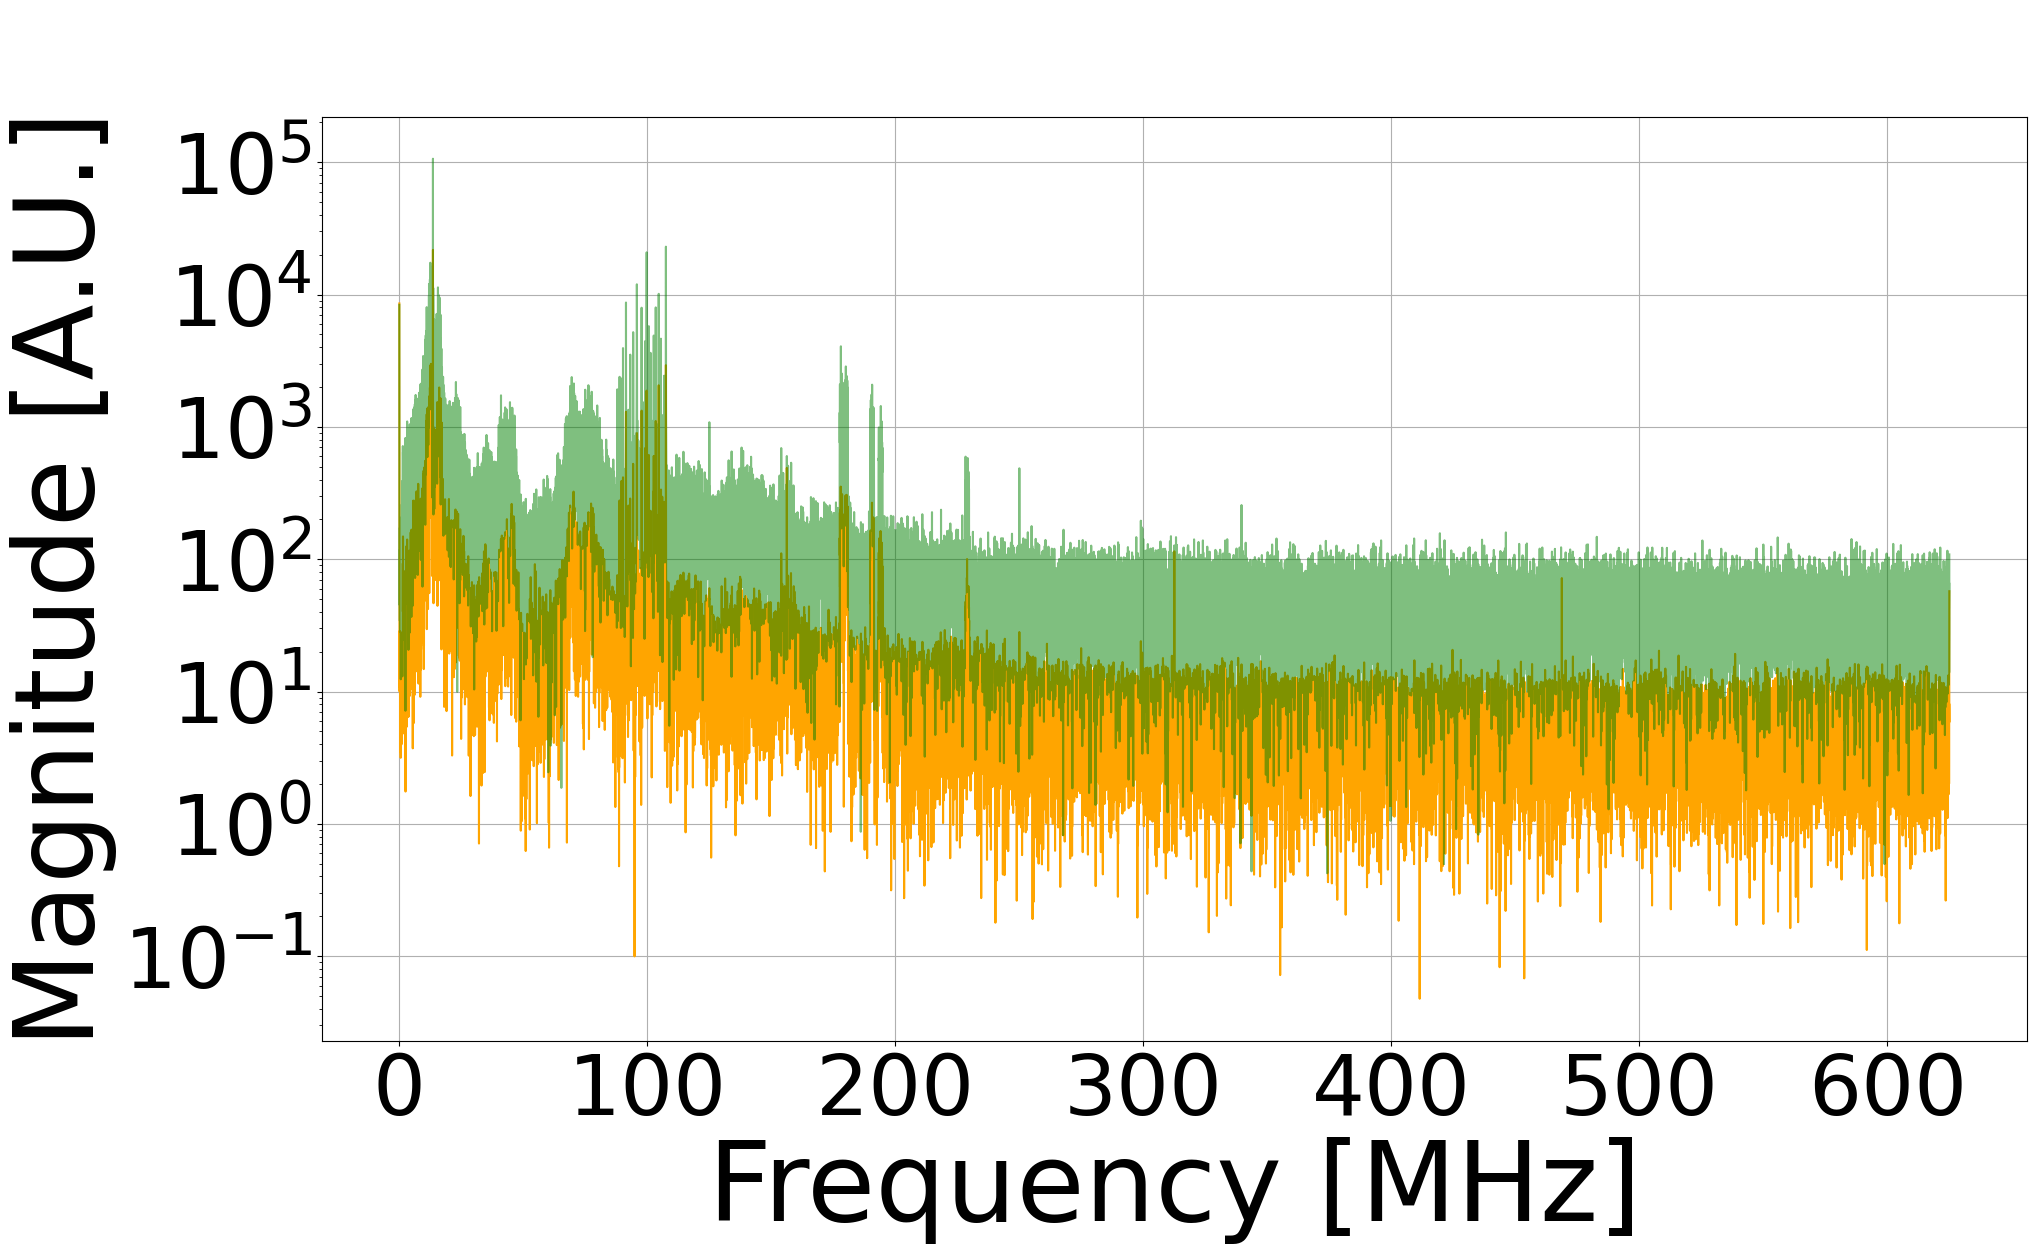

In [12]:
span_A = times_A[len(times_A)-1] 
f_s = len(times_A) / span_A
print(f"f_s = {f_s}")
freqs_A = fft.rfftfreq(len(avg_wf), 1/f_s) #window lenght, sample spacing


Y_A = rfft(avg_wf)
Y_single_wf_A = rfft(all_amplitudes_A[1, :])

plt.figure(figsize=(22, 12))
plt.plot(freqs_A, Y_A, color = 'orange')
plt.plot(freqs_A, Y_single_wf_A, alpha = 0.5, color = 'green')

plt.title(' ', fontsize = 80)
plt.xlabel('Frequency [MHz]', fontsize = 80)
plt.xticks(fontsize = 60)
plt.ylabel('Magnitude [A.U.]', fontsize = 80)
plt.yticks(fontsize = 60)
plt.grid(True)
plt.semilogy()
plt.show()

In [19]:
Y_A_log = np.log(Y_A)
Y_single_wf_A_log = np.log(Y_single_wf_A)

In [23]:
offset_blue = np.mean(Y_A_log[(freqs_A >= 250) & (freqs_A <= 350)])
offset_orange = np.mean(Y_single_wf_A_log[(freqs_A >= 250) & (freqs_A <= 350)])
print(f"offset blue: {offset_blue} - offset orange: {offset_orange} = {offset_blue - offset_orange}")
diff = offset_blue - offset_orange

offset blue: 1.6910403497866486 - offset orange: 3.763240445529131 = -2.0722000957424824


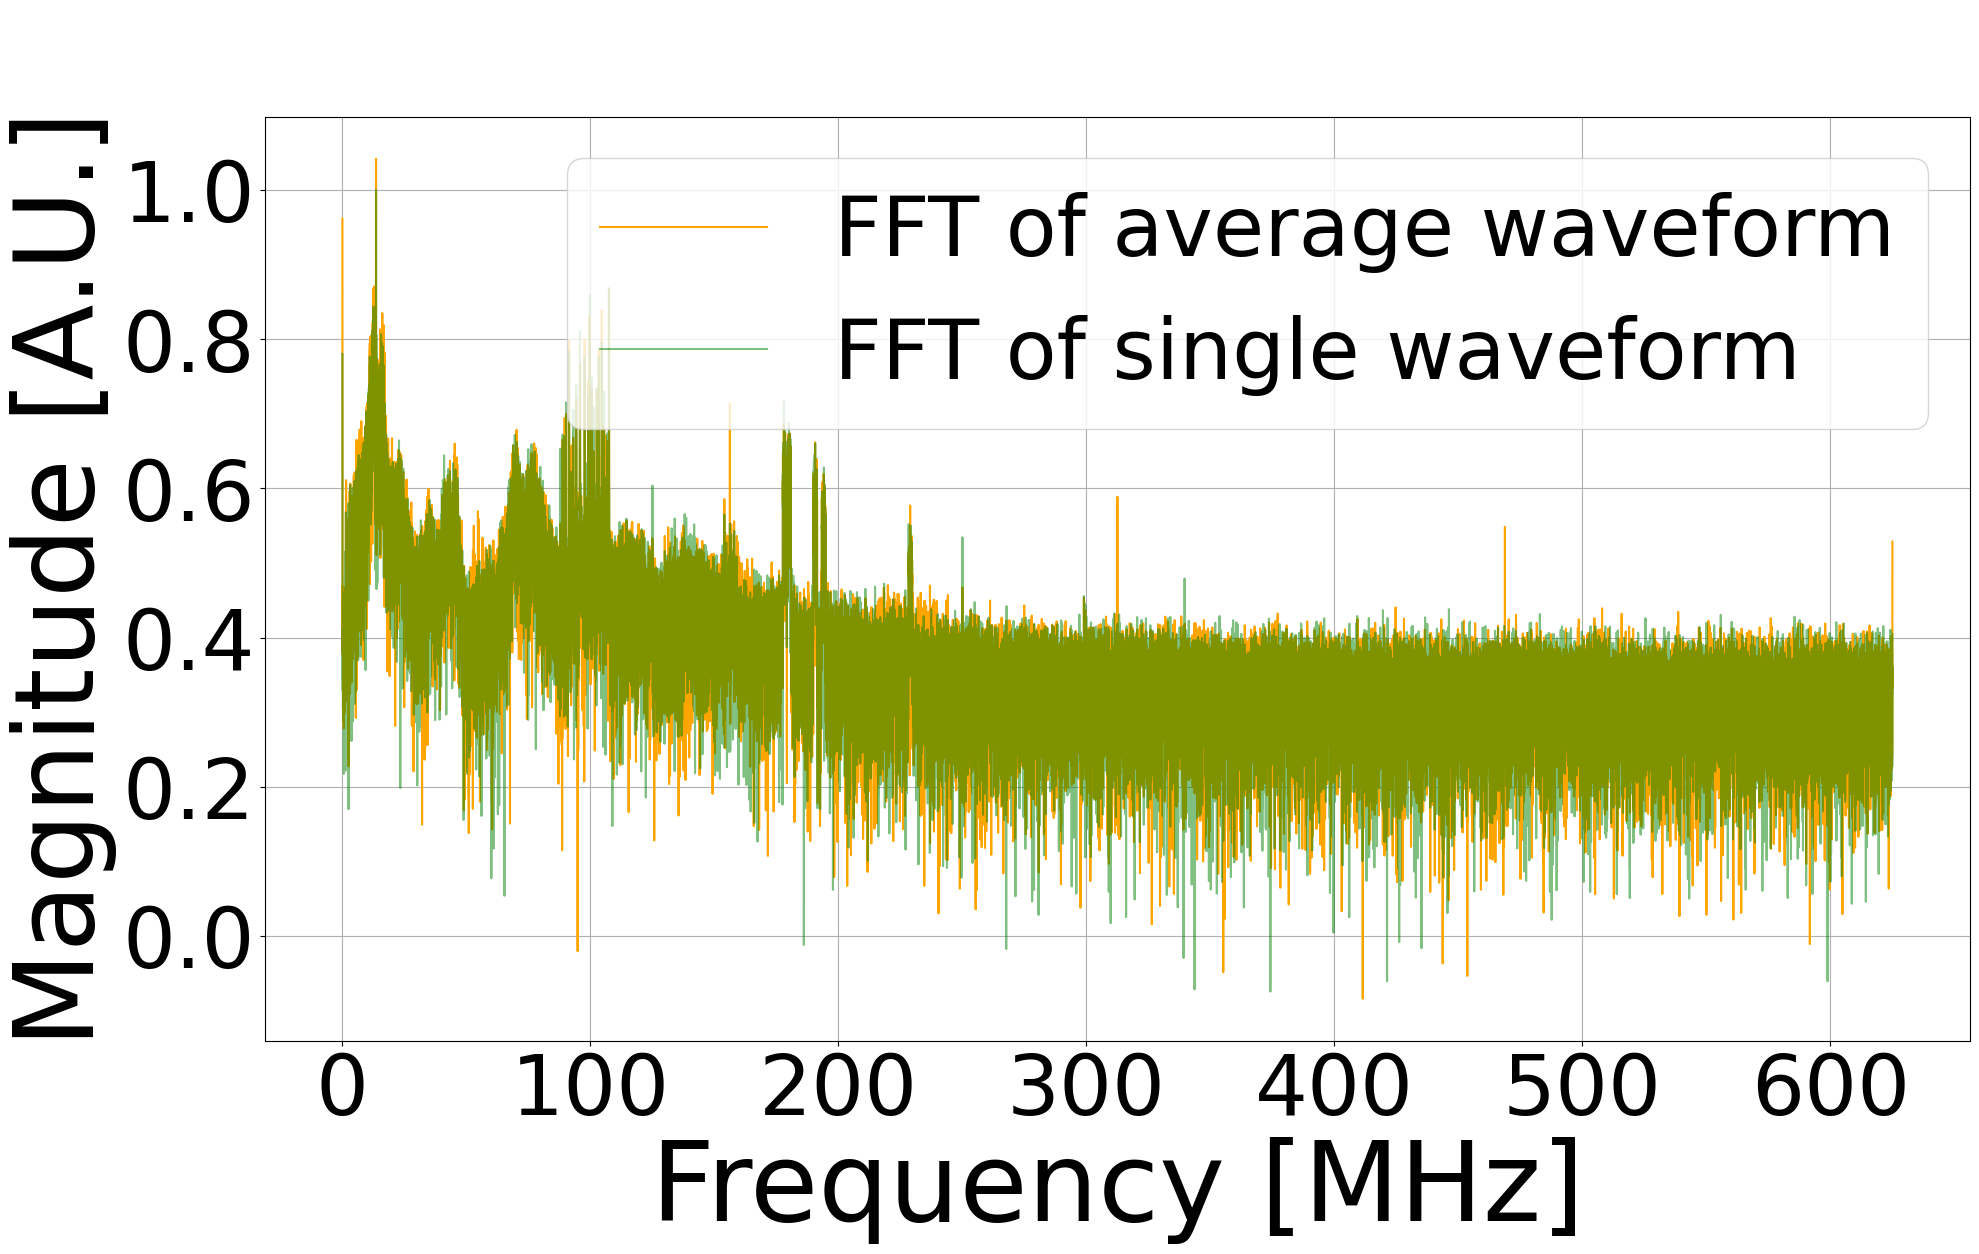

In [24]:
plt.figure(figsize = (22, 12))
plt.plot(freqs_A, (Y_A_log - diff)/max(Y_single_wf_A_log), color = 'orange', label = 'FFT of average waveform')
plt.plot(freqs_A, (Y_single_wf_A_log)/max(Y_single_wf_A_log), alpha = 0.5, color = 'green', label = 'FFT of single waveform')

plt.title(' ', fontsize = 80)
plt.xlabel('Frequency [MHz]', fontsize = 80)
plt.xticks(fontsize = 60)
plt.ylabel('Magnitude [A.U.]', fontsize = 80)
plt.yticks(fontsize = 60)
plt.legend(fontsize = 60)
plt.grid(True)


plt.show()

# Method B: Average of the FFTs

In [25]:
file_pattern_wfs = f"../../Waveforms/{day}/{day}_{hour}/{day}_{hour}_wf.csv/{day}_{hour}_wf_*.csv"
file_list_wfs = glob.glob(file_pattern_wfs)

amplitudes_list_B = []


if not file_list_wfs:
    print("No files found for the given pattern.")
else:
    for i, file in enumerate(file_list_wfs):
        df = pd.read_csv(file)
        print(df)
        if i == 0:
            times_B = pd.to_numeric(df.iloc[1:, 0], errors = 'coerce').values
        amplitudes_B = pd.to_numeric(df.iloc[1:, 1], errors='coerce').values
        if np.isnan(amplitudes_B).any():
            nan_indices = np.where(np.isnan(amplitudes_B))[0]
            print(f"Input data contains NaN values in {nan_indices} at {i} file.")
            amplitudes_B[nan_indices] = 0
 
        amplitudes_list_B.append(amplitudes_B)
        
all_amplitudes_B = np.stack(amplitudes_list_B, axis = 0)
print(all_amplitudes_B)


              Time    Channel D
0             (us)         (mV)
1       0.00000000  -1.96850400
2       0.00080000  -1.57480300
3       0.00160000  -1.18110200
4       0.00240000  -0.78740150
...            ...          ...
62500  49.99920067   0.00000000
62501  50.00000067   0.39370070
62502  50.00080067  -0.39370070
62503  50.00160067  -1.18110200
62504  50.00240067  -1.18110200

[62505 rows x 2 columns]
              Time    Channel D
0             (us)         (mV)
1       0.00000000   1.57480300
2       0.00080000   0.78740150
3       0.00160000   0.00000000
4       0.00240000   0.00000000
...            ...          ...
62500  49.99920067   1.57480300
62501  50.00000067   0.78740150
62502  50.00080067  -0.39370070
62503  50.00160067  -2.75590500
62504  50.00240067  -4.72440900

[62505 rows x 2 columns]
              Time    Channel D
0             (us)         (mV)
1       0.00000000  -0.39370070
2       0.00080000  -0.39370070
3       0.00160000   0.39370070
4       0.00240000  

### compute the FFTs

In [26]:
Ys_list = []

print(all_amplitudes_B.shape[0])
for i in range(all_amplitudes_B.shape[0]):
    Y_B = rfft(all_amplitudes_B[i, :])
    Ys_list.append(Y_B)

Ys_B = np.stack(Ys_list, axis = 0)
print(f"Ys_B: {Ys_B}")

64
Ys_B: [[8.20944824e+03 5.02814981e+01 9.14076906e+01 ... 3.34337097e+01
  1.04841911e+01 6.29909240e+00]
 [8.35511743e+03 1.21941471e+02 1.70191126e+02 ... 2.30698604e+01
  2.75865552e+01 1.08661365e+02]
 [8.64842449e+03 9.13774257e+01 7.99020860e+01 ... 3.50212226e+01
  1.28644238e+02 2.79527228e+01]
 ...
 [7.00078683e+03 2.41554680e+02 1.24726627e+02 ... 6.04167596e+01
  3.11361724e+01 1.41732064e+01]
 [8.27519611e+03 1.48597850e+02 4.23257171e+01 ... 3.15666666e+01
  7.38447365e+01 1.18105450e+00]
 [7.72913334e+03 5.13739037e+01 3.94838019e+01 ... 6.14380039e+01
  9.45452613e+01 7.00787232e+01]]


In [28]:
span_B = times_B[len(times_B)-1] 
f_s_avg_fft = len(times_B) / span_B
print(f"f_s_avg_fft = {f_s_avg_fft}")
freqs_B = fft.rfftfreq(all_amplitudes_B.shape[1], 1/f_s_avg_fft) #window lenght, sample spacing

avg_fft_B = np.mean(Ys_B, axis = 0)

f_s_avg_fft = 1250.0199822905822


In [31]:
avg_fft_B_log = np.log(avg_fft_B)
Y_B_log = np.log(Y_B)
offset_blue = np.mean(avg_fft_B_log[(freqs_B >= 250) & (freqs_B <= 350)])
offset_orange = np.mean(Y_B_log[(freqs_B >= 250) & (freqs_B <= 350)])
print(f"offset blue: {offset_blue} - offset orange: {offset_orange} = {offset_blue - offset_orange}")
diff = offset_blue - offset_orange

offset blue: 3.9295246867096676 - offset orange: 3.771119922596193 = 0.1584047641134747


### compute and plot the mean of the FFTs

f_s = 1250.0199822905822


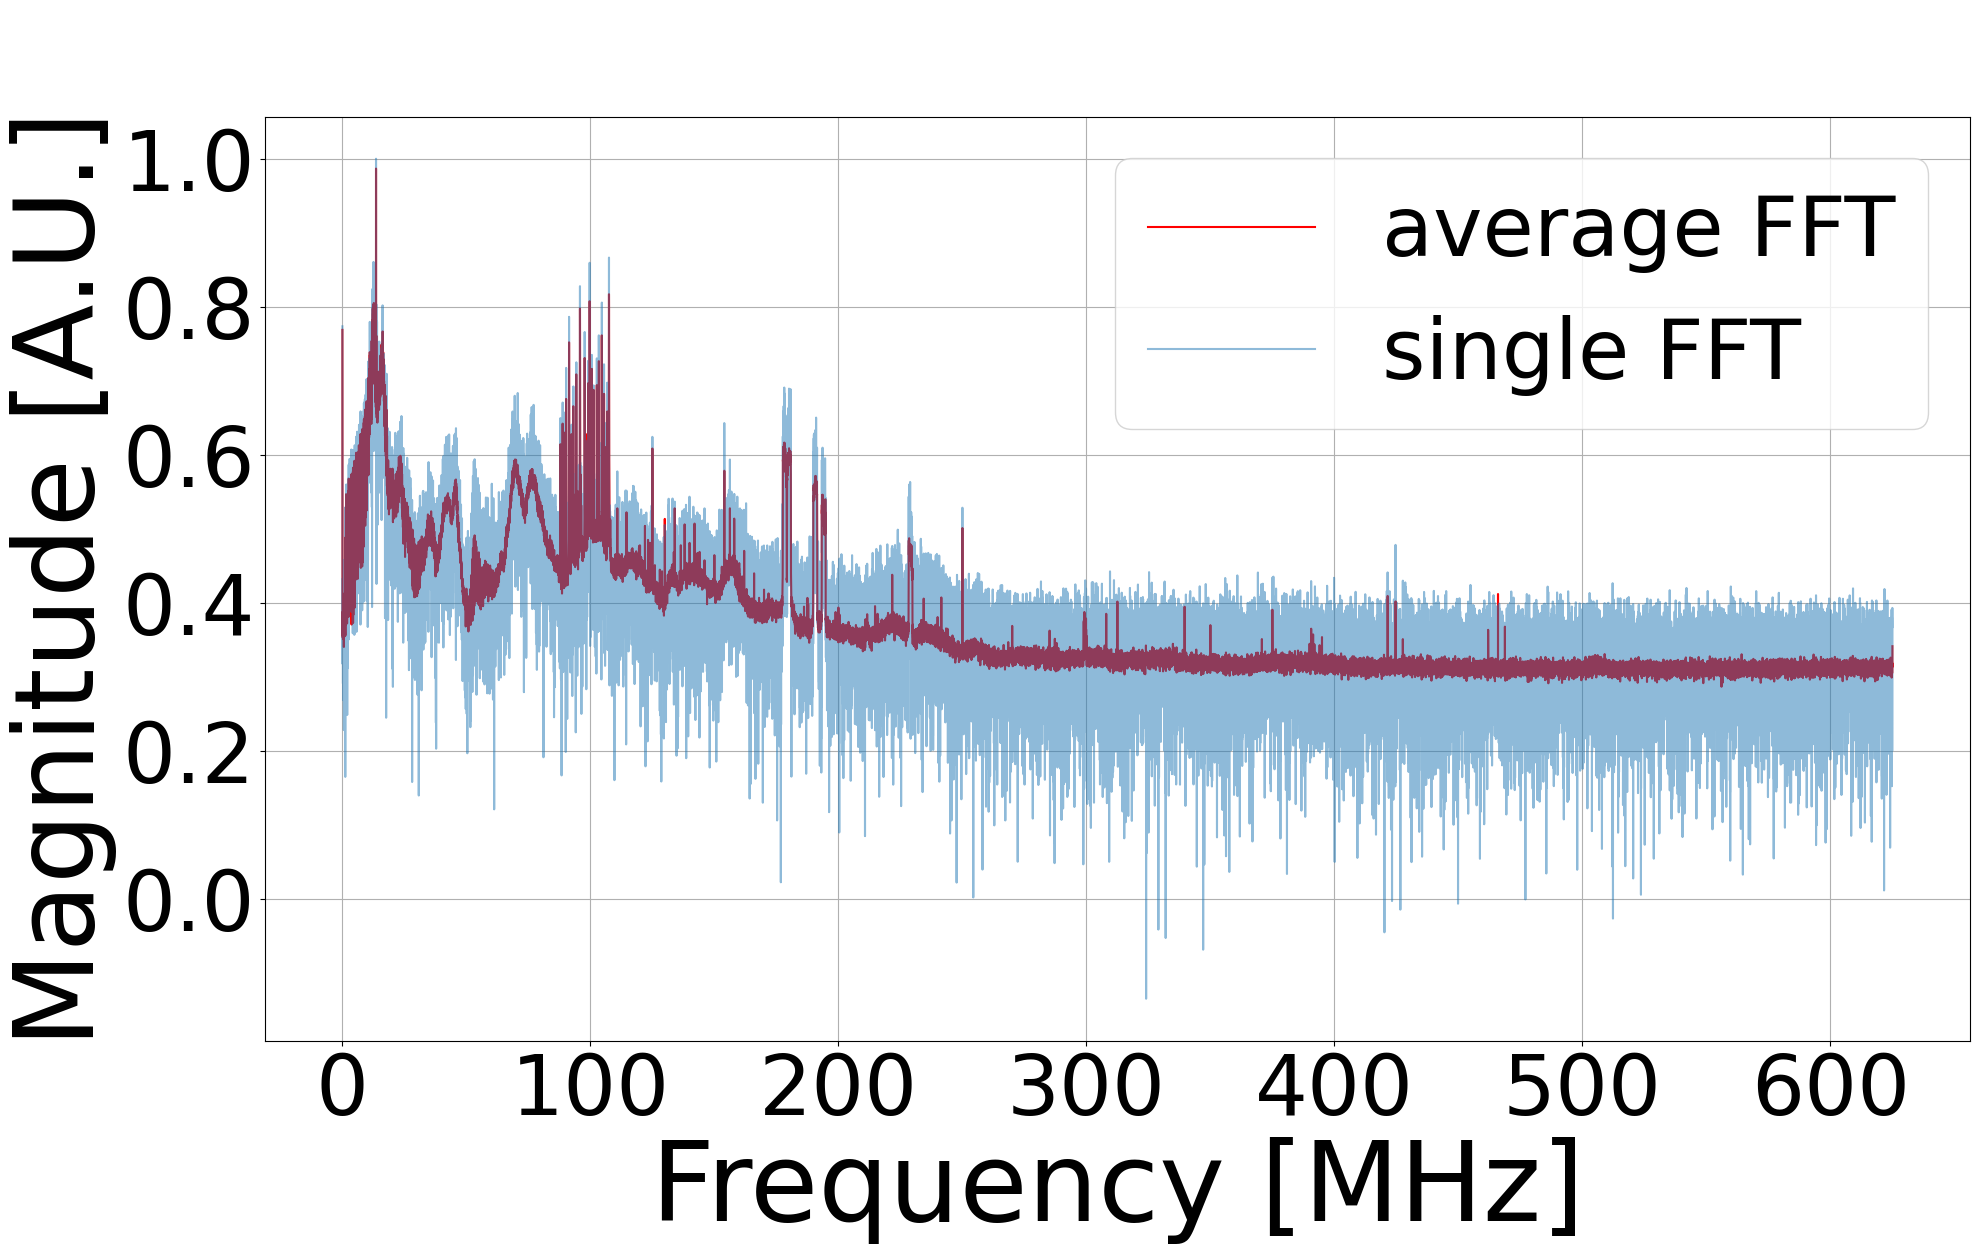

In [33]:
span_B = times_B[len(times_B)-1] 
f_s = len(times_B) / span_B
print(f"f_s = {f_s}")
freqs_B = fft.rfftfreq(all_amplitudes_B.shape[1], 1/f_s) #window lenght, sample spacing


plt.figure(figsize=(22, 12))
plt.plot(freqs_B, (avg_fft_B_log - diff)/max(Y_B_log), color = 'red', label = 'average FFT')
plt.plot(freqs_B, Y_B_log/max(Y_B_log), alpha = 0.5, label = 'single FFT')

plt.title(' ', fontsize = 80)
plt.xlabel('Frequency [MHz]', fontsize = 80)
plt.xticks(fontsize = 60)
plt.ylabel('Magnitude [A.U.]', fontsize = 80)
plt.yticks(fontsize = 60)
plt.grid(True)
plt.legend(fontsize = 60)

plt.show()


# Comparison between the two methods

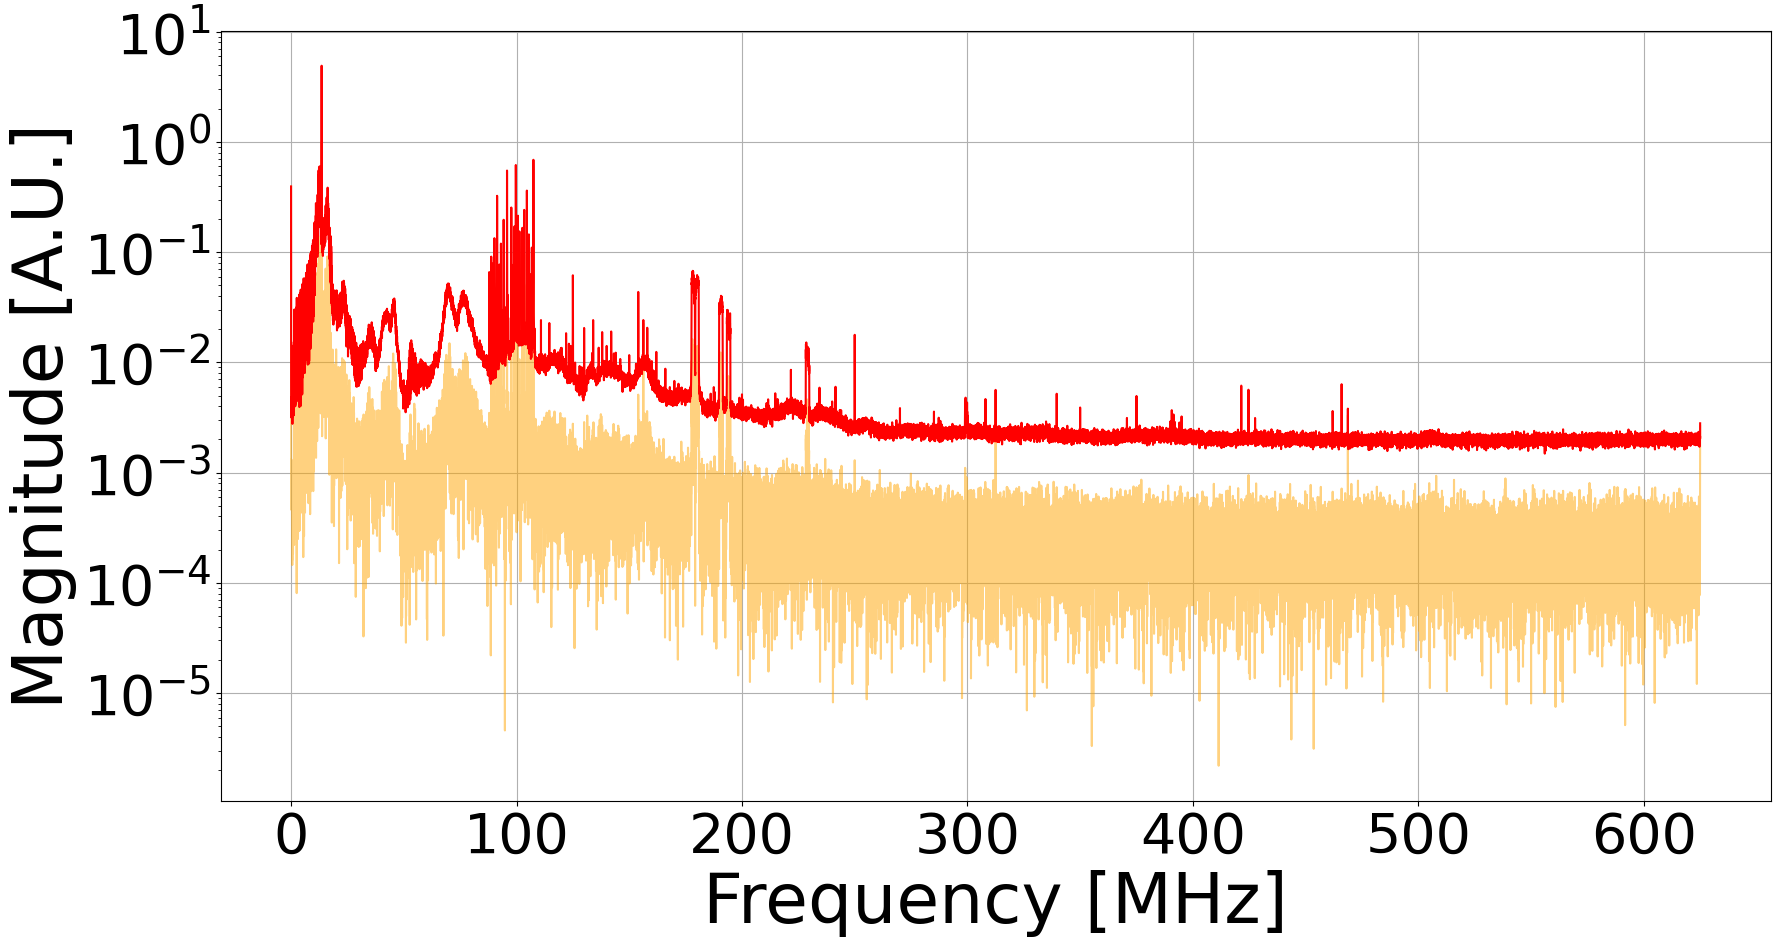

In [34]:
plt.figure(figsize=(20, 10))

#plt.errorbar(freqs, Y_dBu, yerr = Y_err_dBu, fmt='o', markersize = 2, ecolor='red', capsize = 3, capthick=1, elinewidth=1)
plt.plot(freqs_A, Y_A/max(Y_A), alpha = 0.5, color = 'orange')
plt.title('', fontsize = 50)
plt.xlabel('Frequency [MHz]', fontsize = 50)
plt.xticks(fontsize = 40)
plt.ylabel('Magnitude [A.U.]', fontsize = 50)
plt.yticks(fontsize = 40)
plt.grid(True)
plt.semilogy()

#---------------------------------------------------------------
#plt.errorbar(freqs, B_dBu, yerr = stds_fft_dBu, fmt='o', markersize = 2, ecolor='red', capsize = 3, capthick=1, elinewidth=1)
plt.plot(freqs_B, avg_fft_B/max(Y_A), color = 'red')

#plt.savefig("../../Results/080824_15.42/A_vs_B_fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

In [35]:
offset_blue = np.mean(Y_A_log[(freqs_A >= 250) & (freqs_A <= 350)])
offset_orange = np.mean(avg_fft_B_log[(freqs_B >= 250) & (freqs_B <= 350)])
print(f"offset blue: {offset_blue} - offset orange: {offset_orange} = {offset_blue - offset_orange}")
diff = offset_blue - offset_orange 

offset blue: 1.6910403497866486 - offset orange: 3.9295246867096676 = -2.238484336923019


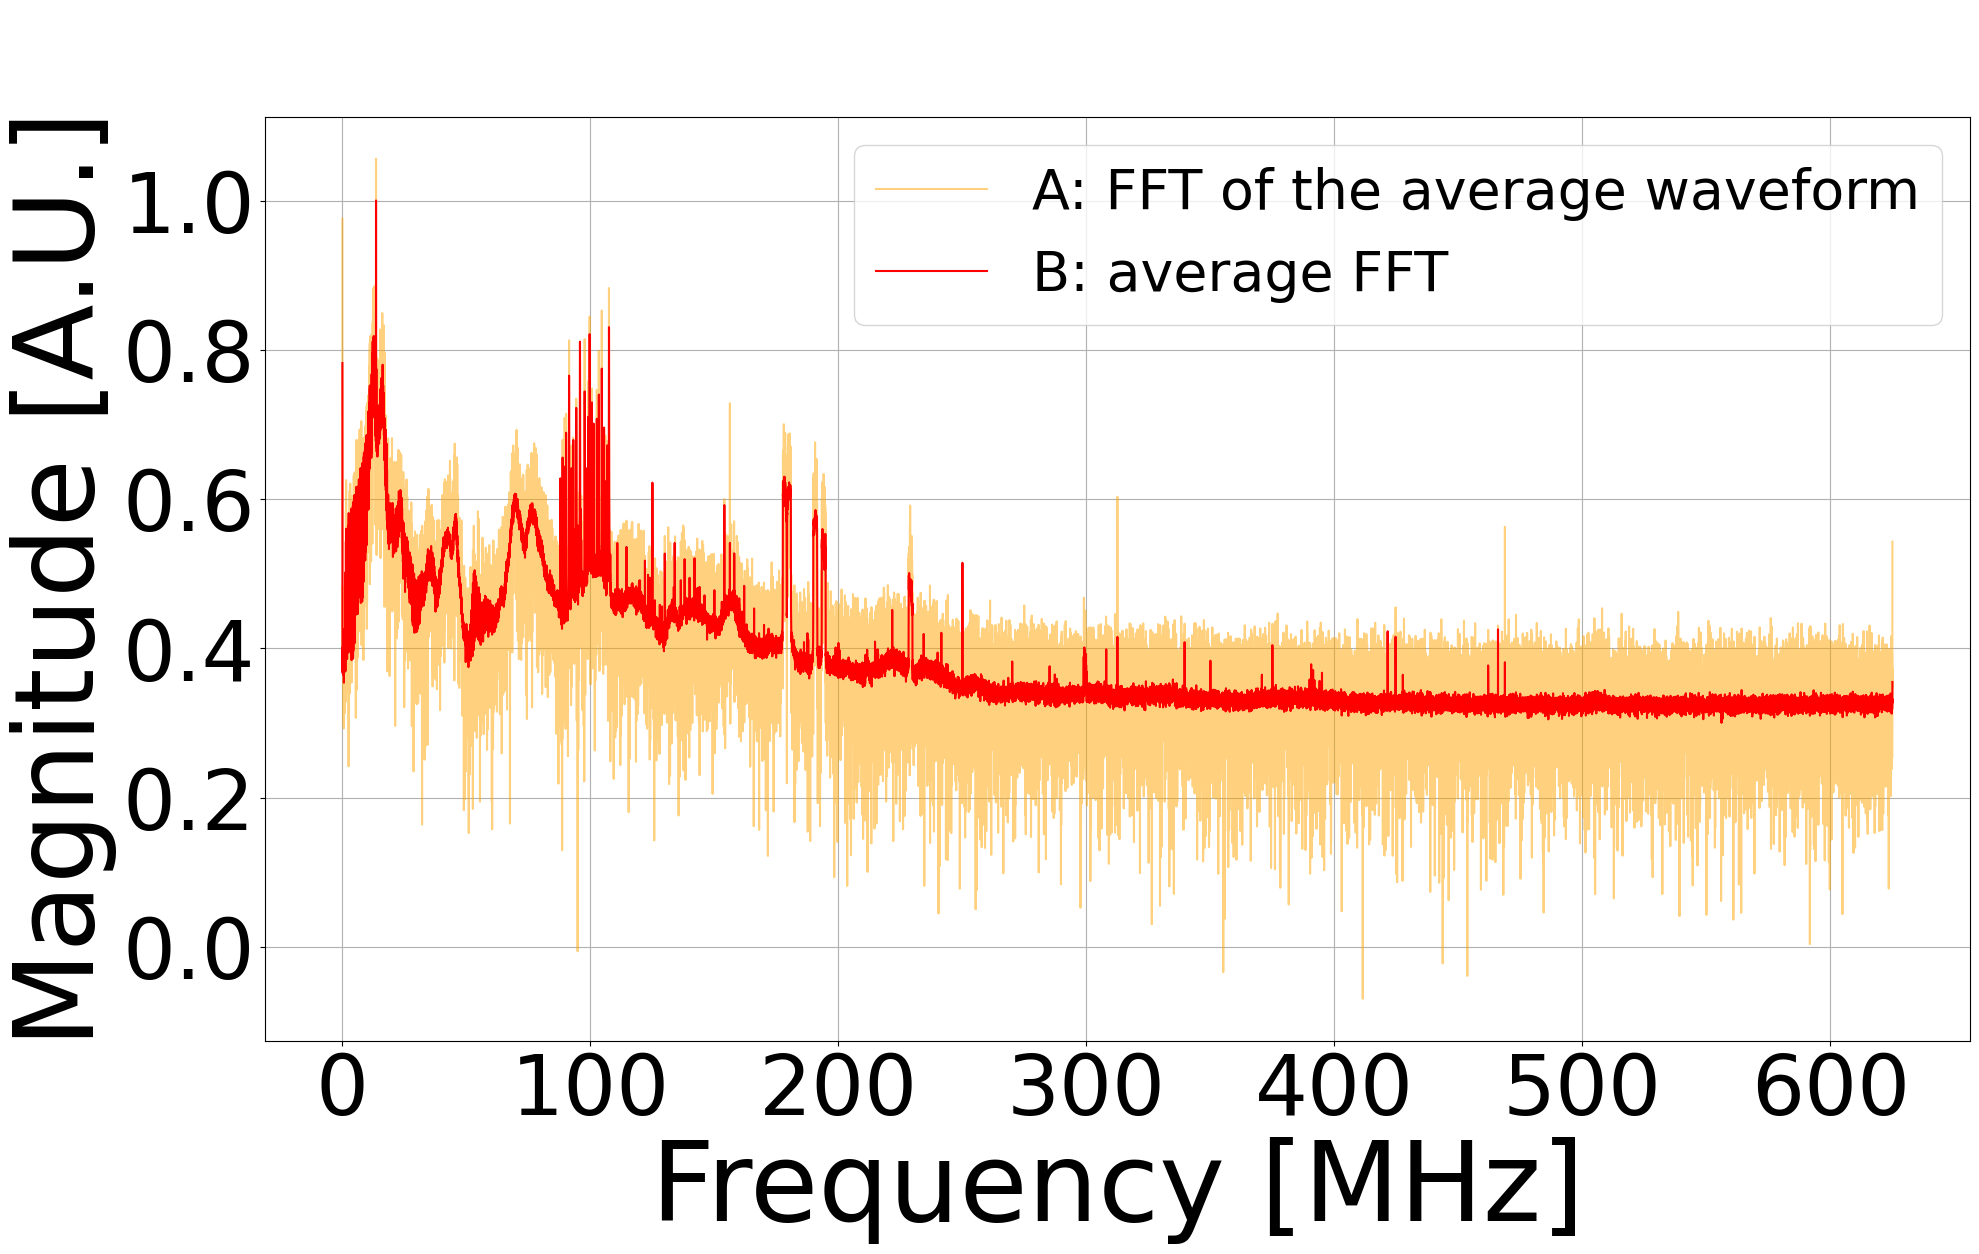

In [39]:
plt.figure(figsize=(22, 12))
plt.plot(freqs_A, (Y_A_log - diff)/max(avg_fft_B_log), alpha = 0.5, color = 'orange', label = 'A: FFT of the average waveform')

plt.title(' ', fontsize = 80)
plt.xlabel('Frequency [MHz]', fontsize = 80)
plt.xticks(fontsize = 60)
plt.ylabel('Magnitude [A.U.]', fontsize = 80)
plt.yticks(fontsize = 60)
plt.grid(True)

#---------------------------------------------------------------

plt.plot(freqs_B, avg_fft_B_log/max(avg_fft_B_log), color = 'red', label = 'B: average FFT')

plt.legend(fontsize = 40)
plt.savefig("../Results/080824_15.42/A_vs_B.png", format = "png", bbox_inches="tight")
plt.savefig("../Results/080824_15.42/A_vs_B.pdf", format = "pdf", bbox_inches="tight")

plt.show()